In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [35]:
from tensorflow.keras.datasets import fashion_mnist

In [36]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_test.shape

(10000, 28, 28)

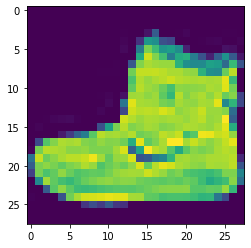

In [39]:
plt.imshow(x_train[0])

## Scaleint image

In [40]:
x_train = x_train/255

In [41]:
x_test = x_test/255

## on hot encode the labels 

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_test_cat = to_categorical(y_test)

In [44]:
y_train_cat = to_categorical(y_train)

## reshaping images 

In [45]:
x_train = x_train.reshape(60000,28,28,1)

In [46]:
x_test = x_test.reshape(10000,28,28,1)

## Preparing the model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

In [48]:
stop = EarlyStopping(monitor="val_loss", mode = "min", patience=3)

In [49]:
y_test_cat.shape

(10000, 10)

In [50]:
model = Sequential()
model.add(Conv2D(filters = 64, padding = "valid", strides = (1,1),
                kernel_size = (2,2), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, padding = "valid", strides = (1,1),
                kernel_size = (2,2), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 250, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## Fitting model

In [51]:
model.fit(x_train, y_train_cat, validation_data=(x_test,y_test_cat), epochs=3, callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 449s 7ms/sample - loss: 0.4116 - accuracy: 0.8503 - val_loss: 0.3321 - val_accuracy: 0.8761
Epoch 2/3
60000/60000 [==============================] - 461s 8ms/sample - loss: 0.2794 - accuracy: 0.8972 - val_loss: 0.2927 - val_accuracy: 0.8919
Epoch 3/3
60000/60000 [==============================] - 472s 8ms/sample - loss: 0.2341 - accuracy: 0.9121 - val_loss: 0.2602 - val_accuracy: 0.8979


In [52]:
metrics = pd.DataFrame(model.history.history)

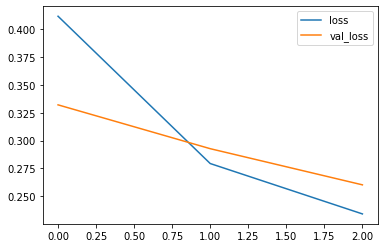

In [53]:
metrics[["loss", "val_loss"]].plot()

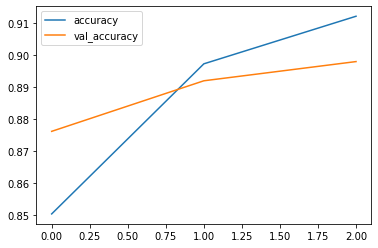

In [55]:
metrics[["accuracy", "val_accuracy"]].plot()

#### Predictions

In [56]:
predictions = model.predict_classes(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [58]:
print(confusion_matrix(y_test, predictions))

[[791   0   8  28   4   0 162   0   7   0]
 [  3 977   1  15   1   0   1   0   2   0]
 [ 12   1 766   7 118   0  93   0   3   0]
 [  7   5   8 919  24   0  33   0   4   0]
 [  1   1  22  31 895   0  49   0   1   0]
 [  0   0   0   0   0 979   0  12   1   8]
 [ 81   2  49  25  88   0 740   0  15   0]
 [  0   0   0   0   0   5   0 939   1  55]
 [  0   0   0   3   3   1   1   0 992   0]
 [  0   0   0   0   0   5   1  13   0 981]]


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.90      0.77      0.83      1000
           3       0.89      0.92      0.91      1000
           4       0.79      0.90      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.69      0.74      0.71      1000
           7       0.97      0.94      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [60]:
print(explained_variance_score(y_test,predictions))

0.8207666230303031


### Random Predicitons

In [88]:
from random import randint
random_index = randint(1, len(x_train))
random_image = x_train[random_index]

In [89]:
random_image.shape

(28, 28, 1)

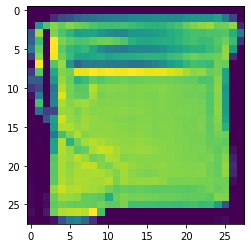

In [90]:
plt.imshow(random_image.reshape(28,28))

In [91]:
y_train[random_index]

8

### Data Validation

In [92]:
items = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
labels = [0,1,2,3,4,5,6,7,8,9]

In [93]:
data = pd.DataFrame(items, index=labels, columns=["item_name"])

In [94]:
data.iloc[y_train[random_index]]

item_name    Bag
Name: 8, dtype: object